In [23]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
Datos = pd.read_csv('c:/users/ACER/desktop/heart_cleveland_upload.csv')

In [281]:
Datos.head(20)

,edad,sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [283]:
Datos.describe()

,edad,sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

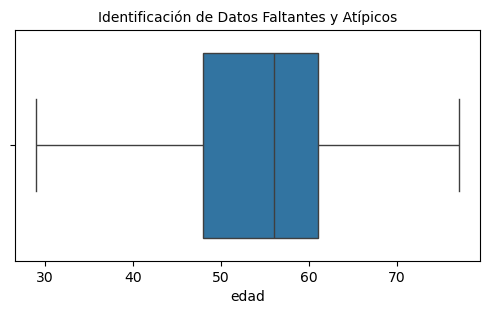

In [287]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['edad'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

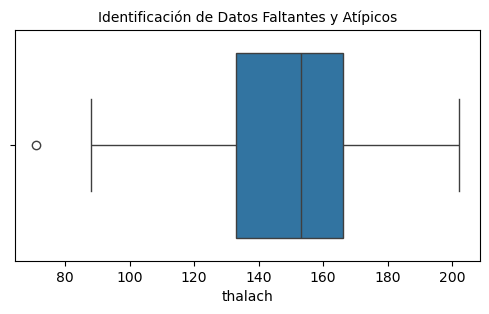

In [289]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

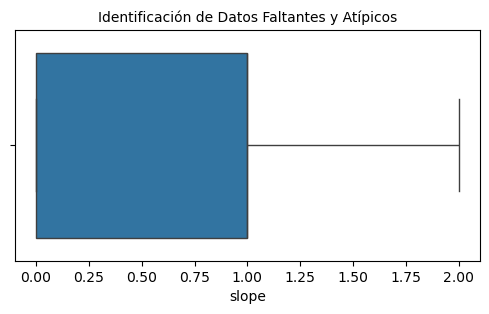

In [293]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['slope'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

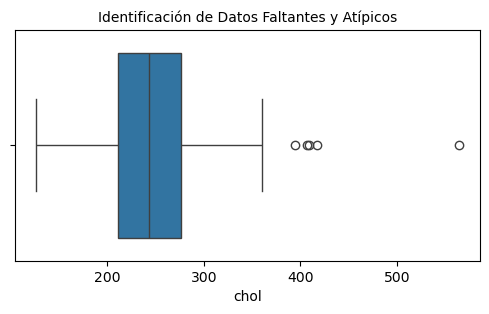

In [295]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [297]:
print("Cantidad de Registros con cero en trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en edad: ",Datos['edad'].isin([0]).sum())
print("Cantidad de Registros con cero en sexo: ",Datos['sexo'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en exang: ",Datos['exang'].isin([0]).sum())

Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en edad:  0
Cantidad de Registros con cero en sexo:  96
Cantidad de Registros con cero en ca:  174
Cantidad de Registros con cero en exang:  200


In [299]:
Datos['trestbps']=Datos['trestbps'].replace(0,Datos['trestbps'].mean())
Datos['edad']=Datos['edad'].replace(0,Datos['edad'].mean())
Datos['sexo']=Datos['sexo'].replace(0,Datos['sexo'].mean())
Datos['ca']=Datos['ca'].replace(0,Datos['ca'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())

In [301]:
print("Cantidad de Registros con cero en trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en edad: ",Datos['edad'].isin([0]).sum())
print("Cantidad de Registros con cero en sexo: ",Datos['sexo'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en exang: ",Datos['exang'].isin([0]).sum())

Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en edad:  0
Cantidad de Registros con cero en sexo:  0
Cantidad de Registros con cero en ca:  0
Cantidad de Registros con cero en exang:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

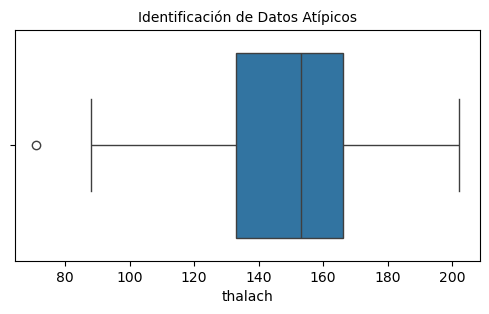

In [157]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [303]:
nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [305]:
Datos=Datos[(Datos['thalach']<nivel_maximo)&(Datos['thalach']>nivel_minimo)]

In [307]:
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [309]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   edad       297 non-null    int64  
 1   sexo       297 non-null    float64
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    float64
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    float64
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 32.6 KB


In [311]:
# Total de personas con enfermedad cardiaca 
Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [370]:
X = Datos.drop('condition',axis=1) 
Y = Datos['condition'] 

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, stratify=Y, random_state= 0)

In [372]:
print (X_train)

     edad      sexo  cp  trestbps  chol  fbs  restecg  thalach     exang  \
174    64  1.000000   3       120   246    0        2       96  1.000000   
172    65  1.000000   3       120   177    0        0      140  0.326599   
23     74  0.676768   1       120   269    0        2      121  1.000000   
227    57  1.000000   3       110   201    0        0      126  1.000000   
254    53  1.000000   3       142   226    0        2      111  1.000000   
..    ...       ...  ..       ...   ...  ...      ...      ...       ...   
67     41  0.676768   1       126   306    0        0      163  0.326599   
15     52  1.000000   0       118   186    0        2      190  0.326599   
194    61  1.000000   3       138   166    0        2      125  1.000000   
126    50  1.000000   2       140   233    0        0      163  0.326599   
12     59  1.000000   0       134   204    0        0      162  0.326599   

     oldpeak  slope        ca  thal  
174      2.2      2  1.000000     0  
172      0.

In [374]:
print (X_test)

     edad      sexo  cp  trestbps  chol  fbs  restecg  thalach     exang  \
217    58  1.000000   3       146   218    0        0      105  0.326599   
219    58  0.676768   3       170   225    1        2      146  1.000000   
148    41  1.000000   2       112   250    0        0      179  0.326599   
263    50  1.000000   3       150   243    0        2      128  0.326599   
162    67  1.000000   3       125   254    1        0      163  0.326599   
..    ...       ...  ..       ...   ...  ...      ...      ...       ...   
280    44  1.000000   3       112   290    0        2      153  0.326599   
46     52  1.000000   1       120   325    0        0      172  0.326599   
230    57  1.000000   3       130   131    0        0      115  1.000000   
35     57  1.000000   1       154   232    0        2      164  0.326599   
279    44  1.000000   3       120   169    0        0      144  1.000000   

     oldpeak  slope        ca  thal  
217      2.0      1  1.000000     2  
219      2.

In [376]:
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [378]:
X_test.head(15)

,edad,sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,58,1.000000,3,146,218,0,0,105,0.326599,2.0,1,1.000000,2
219,58,0.676768,3,170,225,1,2,146,1.000000,2.8,1,2.000000,1
148,41,1.000000,2,112,250,0,0,179,0.326599,0.0,0,0.676768,0
263,50,1.000000,3,150,243,0,2,128,0.326599,2.6,1,0.676768,2
162,67,1.000000,3,125,254,1,0,163,0.326599,0.2,1,2.000000,2
151,39,1.000000,2,140,321,0,2,182,0.326599,0.0,0,0.676768,0
110,54,0.676768,2,135,304,1,0,170,0.326599,0.0,0,0.676768,0
108,54,1.000000,2,120,258,0,2,147,0.326599,0.4,1,0.676768,2
39,56,1.000000,1,130,221,0,2,163,0.326599,0.0,0,0.676768,2
133,47,1.000000,2,108,243,0,0,152,0.326599,0.0,0,0.676768,0


In [380]:
print (Prediccion)

[1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1]


In [382]:
print(classification_report(Y_test,Prediccion))


              precision    recall  f1-score   support

           0       0.83      0.93      0.87        56
           1       0.90      0.77      0.83        48

    accuracy                           0.86       104
   macro avg       0.86      0.85      0.85       104
weighted avg       0.86      0.86      0.85       104



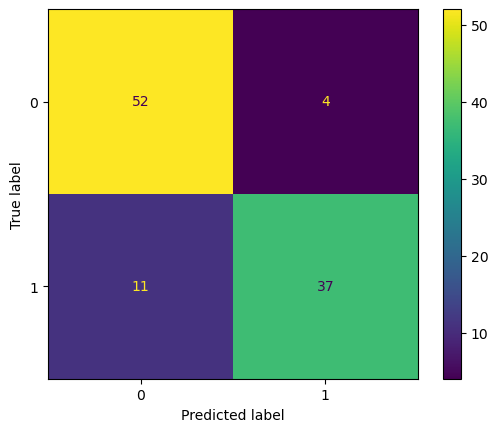

In [384]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

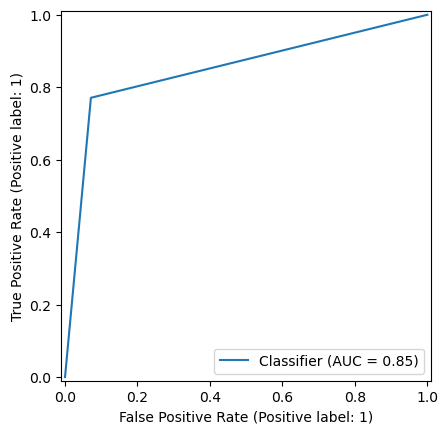

In [386]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()